#### *Applied Mathematical Finance 2*

## <ins> *Seminar 3: Equity Derivatives II* </ins>

### 1. Asian basket option

Many exotic equity derivatives are based on the performance of the basket of stocks/indexes. A classic and wide-ranging example is an Asian basket option. Its pyaoff can be written as 

$$\text{Payoff} = \left( \sum_{i, j = 1}^{n, m} w_{ij} S^{j}_{t_i} - K \right)_{+},$$

where $K$ is the strike of the option, $S^{j}_{t_i}$ is the price of the $j$-th asset in a basket at given time moment $t_i$, $w_{ij}$ are the weights. 

There are many approaches to pricing such derivatives based on the Monte-Carlo engine or PDE solving. However, in case of moderate/high number of time fixings $n$ the pricing of such derivative with the methods above turns out to be time consuming. It turns out that for such products it is possible to obtain an analytical approximation that allows you to quickly and fairly accurately calculate the presetn value. One of such methods is based on moment matching. 

##### 1.1 Framework

The $j$-th stoch price at moment $t$ in risk neutral measure $\mathbb{Q}$ is gievn by 

$$S^{j}_{t} = F^{j}_t \cdot e^{-\frac{1}{2} \int_{0}^{t} \sigma^2_j(s) ds + \int_{0}^{t}\sigma_j(s) dW^{\mathbb{Q}}_j(s)}$$
where $F^{j}_t$ is the forward  of the $j$-th underlying for maturity $t$. 

From Black's formula, one can easily check that 
$$\int_{0}^{t} \sigma_j^{2}(s) ds = \hat \sigma^{2}_j(t) \cdot t,$$

where $\hat \sigma_j(t)$ is the implied vol of $S^{j}$ for maturity $t$. 

For a fixed time moment $T$, the log-covariance matrix $C = \{ c_{i, j}\}$ of the vector $(S^{1}(T), \cdots, S^{m}(T))$ is given by 

$$c_{j, k} \stackrel{def}{=} \text{Cov} [\ln S^{j}(T), \ln S^{k}(T)] = \rho_{j,k} \int_{0}^{T} \sigma_j(s) \sigma_k(s) ds.$$

For two different time moments $t_i$ and $t_j$ and for a given asset $S^{k}$,

$$c_{i, j} \stackrel{def}{=} \text{Cov} [\ln S^{k}(t_i), \ln S^{k}(t_j)] =  \int_{0}^{t_i \wedge t_j} \sigma^{2}_k(s) ds.$$

Therefore, the Asian optoin can be considered as a special case of basket option. Here and futher we will deal only with basket options.

The payoff of the basket option can be written as 

$$\text{Payoff} = \left( A_T - K \right)_{+},$$

where $A_T \stackrel{def}{=} \sum_{j = 1}^{m} w_{j} S^{j}_{T}$. 

##### 1.2 Analytic approximation

The sum of the log-normal variables in not log-normal. So how we can deal with it? 

The ideas is pretty easy. We consider the shifted log-normal variable 

$$X^{F, \sigma, \delta} = F \cdot e^{-1/2 \sigma^2  + \sigma Z} - \delta,$$

where $Z$ is a standard normal variable. 

Now it remains to "calibrate" this distribution (i.e. find such $(F, \sigma, \delta)$) to match first several moments of $A_T$. In practice, it's occurs enough to calibrate the first three of them. 

The first three moments of $X^{F, \sigma, \delta}$ are the following:

$$
\begin{align*}
\mathbb{E}^{\mathbb{Q}} X^{F, \sigma, \delta} &= F - \delta, \\
\mathbb{E}^{\mathbb{Q}} (X^{F, \sigma, \delta})^2 &= F^2 e^{\sigma^2} - 2F\delta + \delta^2, \\
\mathbb{E}^{\mathbb{Q}} (X^{F, \sigma, \delta})^3 &= F^3 e^{3\sigma^2} - 3F^2 e^{\sigma^2} \delta + 3F\delta^2 - \delta^3.
\end{align*}
$$

The first three moments of $A_T$ are the following:
$$
\begin{align*}
m_1 := \mathbb{E}^{\mathbb{Q}} A_T &= \mathbb{E}^{\mathbb{Q}} \left( \sum_{j=1}^{m} w_j S^{j}_T \right) = \sum_{j=1}^{m} w_j \mathbb{E}^{\mathbb{Q}} (S^{j}_T) =  \sum_{j=1}^{m} w_j F^{j}_T , \\
m_2 :=  \mathbb{E}^{\mathbb{Q}} A_T^2 &= \mathbb{E}^{\mathbb{Q}} \left( \sum_{j=1}^{m} w_j S^{j}_T \right)^2 = \sum_{i, j=1}^{m} w_i w_j \mathbb{E}^{\mathbb{Q}} (S^{i}_T S^{j}_T) =  \sum_{i, j=1}^{m} w_i w_j F^{i}_T F^{j}_T e^{c_{i,j}} , \\
m_3 :=  \mathbb{E}^{\mathbb{Q}} A_T^3 &= \mathbb{E}^{\mathbb{Q}} \left( \sum_{j=1}^{m} w_j S^{j}_T \right)^3 = \sum_{i, k, j=1}^{m} w_i w_k w_j \mathbb{E}^{\mathbb{Q}} (S^{i}_T S^{k}_T S^{j}_T) =  \sum_{i, k, j=1}^{m} w_i w_k w_j F^{i}_T F^{k}_T F^{j}_T e^{c_{i,j} + c_{i, k} + c_{j, k}} . \\
\end{align*}
$$

Thus, the resulting systhem of equations is 
$$
\begin{cases}
F - \delta = m_1, \\
F^2 e^{\sigma^2} - 2F\delta + \delta^2 = m_2, \\
F^3 e^{3\sigma^2} - 3F^2 e^{\sigma^2} \delta + 3F\delta^2 - \delta^3 = m_3.
\end{cases}
$$

Denoting by $\mu_2$ and $\mu_3$ the second and the third centered moments, i.e. $\mu_2 = m_2 - m_1^2$, $\mu_3 = m_3 - 3 m_1 m_2 + 2m_1^3.$, one gets that the solution of the system above is then given by 

$$
\begin{cases}
F^3 - \frac{3\mu_2^2}{\mu_3} F^2 - \frac{\mu_2^3}{\mu_3} = 0, \\
\delta = F - \mu_1, \\
\sigma = \ln^{1/2}(1 + \frac{\mu_2}{F^2}).
\end{cases}
$$

Replacing the $A_T$ with its proxy $X^{F, \sigma, \delta}$, we get that 

$$(A_T - K)_{+} \approx (X^{F, \sigma, \delta} - K)_{+} =  (X^{F, \sigma, \delta} + \delta - (K + \delta))_{+}.$$

Therefore, we get the result
$$
\boxed{
PV^{\text{Basket option}} = \text{Black}(F, K + \delta, \sigma / \sqrt{T}, T).
}
$$

### 2. Numerical example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Any, Union
from scipy.stats import norm
import pandas as pd
import warnings
from scipy.interpolate import PchipInterpolator, interp1d
from cardano_method import CubicEquation
warnings.filterwarnings('ignore')

##### 2.1 Data extraction

In [3]:
spx_vol = pd.read_csv("data/ImpliedVol_SPX.csv", sep=";")
nkel_vol = pd.read_csv("data/ImpliedVol_NKELYQ.csv", sep=";")
spx_forws = pd.read_csv("data/Forwards_SPX.csv", sep=";")
nkel_forws = pd.read_csv("data/Forwards_NKELYQ.csv", sep=";")
discount_factors = pd.read_csv("data/DFs.csv", sep=";")

In [4]:
spx_vol.head()

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,Strike,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Periods,Date,2000.000000,2100.000000,2300.000000,2700.000000,3200.000000,3500.000000,3700.000000,4000.000000,4300.000000,4500.000000,4900.000000,5300.000000,5900.0,6300.0,6800.0,7300.0
1,1,1M,05/09/2021,NaN,NaN,NaN,NaN,NaN,0.255031,0.229717,0.184537,0.142742,0.120222,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2M,05/10/2021,NaN,NaN,NaN,NaN,0.290835,0.258944,0.230097,0.186557,0.147864,0.126235,0.102493,NaN,NaN,NaN,NaN,NaN
3,3,3M,05/11/2021,NaN,NaN,NaN,0.332682,0.296949,0.257722,0.229462,0.189104,0.153375,0.132963,0.107623,0.100413,NaN,NaN,NaN,NaN
4,4,6M,05/02/2022,0.386117,0.382065,0.374263,0.348532,0.288763,0.250947,0.227014,0.193942,0.164735,0.147584,0.122567,0.111081,NaN,NaN,NaN,NaN


In [5]:
nkel_vol.head()

,Unnamed: 0.1,Unnamed: 0,Unnamed: 1,Strike,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Periods,Date,17.400000,18.270000,20.010000,23.490000,27.840000,30.450000,32.190000,34.800000,37.410000,39.150000,42.630000,46.110000,51.330000,54.810000,59.160000,63.510000
1,1,1M,05/09/2021,NaN,NaN,NaN,NaN,0.323000,0.294381,0.278501,0.260514,0.251105,0.248899,0.250043,NaN,NaN,NaN,NaN,NaN
2,2,2M,05/10/2021,NaN,0.445295,0.419221,0.368385,0.316664,0.292034,0.278363,0.262780,0.253895,0.251145,0.250435,0.253264,NaN,NaN,NaN,NaN
3,3,3M,05/11/2021,0.443702,0.430286,0.404598,0.358926,0.313275,0.291387,0.279108,0.264716,0.255625,0.252185,0.249610,0.250501,0.254957,0.258902,NaN,NaN
4,4,6M,05/02/2022,0.412879,0.401646,0.380561,0.344636,0.308813,0.291516,0.281705,0.269790,0.261238,0.257218,0.252241,0.250081,0.249874,0.250866,0.252777,0.255127


In [6]:
spx_forws.head()

,Date,Forwards
0,12/08/2021,4405.261308
1,13/08/2021,4405.182332
2,14/08/2021,4405.221366
3,15/08/2021,4405.260400
4,16/08/2021,4404.494415


In [7]:
nkel_forws.head()

,Date,Forwards
0,12/08/2021,34.850825
1,13/08/2021,34.850943
2,14/08/2021,34.851061
3,15/08/2021,34.851178
4,16/08/2021,34.851296


In [8]:
discount_factors.head()

,Date,DF
0,12/08/2021,0.999976
1,13/08/2021,0.999972
2,14/08/2021,0.999969
3,15/08/2021,0.999965
4,16/08/2021,0.999962


In [9]:
# Extract volatility data

spx_strikes = spx_vol.iloc[0, 3:].values.astype(float)
nkel_strikes = nkel_vol.iloc[0, 3:].values.astype(float)
spx_volatilities = spx_vol.iloc[1:, 3:].values.astype(float)
nkel_volatilities = nkel_vol.iloc[1:, 3:].values.astype(float)

dates = spx_vol.iloc[1:, 2].values # dates are the same for both underlyings
periods = spx_vol.iloc[1:, 1].values # peiords are the same for both underlyings

In [10]:
periods

array(['1M', '2M', '3M', '6M', '9M', '1Y', '18M', '2Y', '3Y', '4Y', '5Y'],
      dtype=object)

In [11]:
periods_floats = np.array([1, 2, 3, 6, 9, 12, 18, 24, 36, 48, 60]) / 12
periods_floats

array([0.08333333, 0.16666667, 0.25      , 0.5       , 0.75      ,
       1.        , 1.5       , 2.        , 3.        , 4.        ,
       5.        ])

In [12]:
# Extract forwards and discount factors

spx_forwards = dict(zip(spx_forws["Date"], spx_forws["Forwards"]))
nkelyq_forwards = dict(zip(nkel_forws["Date"], nkel_forws["Forwards"]))
dfs = dict(zip(discount_factors["Date"], discount_factors["DF"]))

In [13]:
# Value date info

value_date = "05/08/2021" # value date, i.e. date at which all market data above is observed
S_spx = 4406.97 # .SPX close spot quote on 05/08/2021
S_nkel = 34.8 # .NKEL close spot quote on 05/08/2021
corr = 0.5463

##### 2.2 Data visualization

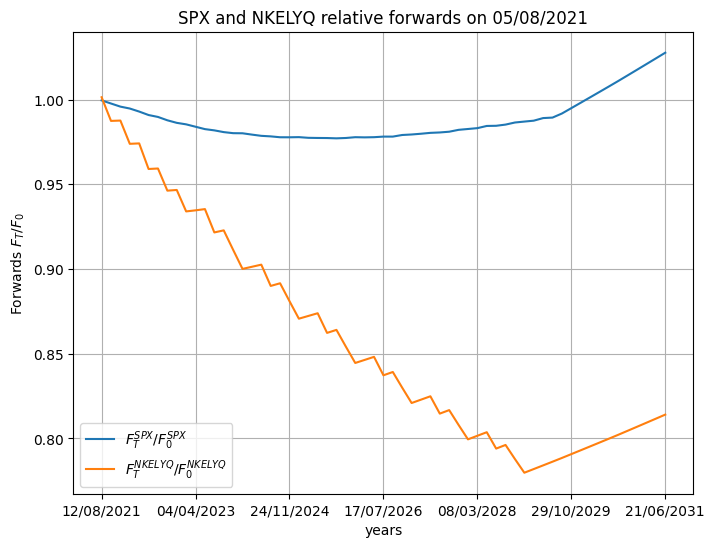

In [14]:
window = 60 # extract forward appeoximately on each 60 days
dates_plot = discount_factors["Date"][::window]
dates_ticks = discount_factors["Date"][:: window * 10]
spx_forwards_plot = spx_forws["Forwards"][::60] / S_spx
nkel_forwards_plot = nkel_forws["Forwards"][::60] / S_nkel
dfs_plot = discount_factors["DF"][::60]

plt.figure(figsize=(8, 6))
plt.title("SPX and NKELYQ relative forwards on {}".format(value_date))
plt.plot(dates_plot, spx_forwards_plot, label="$F^{SPX}_T / F^{SPX}_0$")
plt.plot(dates_plot, nkel_forwards_plot, label="$F^{NKELYQ}_T / F^{NKELYQ}_0$")

plt.xlabel("years")
plt.xticks(dates_ticks)
plt.ylabel("Forwards $F_T / F_0$")
plt.legend()
plt.grid()
plt.show()

In [15]:
def volatility_interpolator(strikes: np.ndarray, volatilities: np.ndarray):
    """
    Returns the volatility interpolator.
    """
    # monotone cubic splines interpolator
    return PchipInterpolator(x=np.log(strikes), y=volatilities)

In [16]:
def create_implied_vol_curves(periods: np.array, strikes: np.ndarray, volatilities: np.ndarray):
    """
    Crates interpolated implied vol curves and corresponding strikes for each tenor. 

    Args:
        periods: array of periods from implied vol termstrucutre backbone. 
        strikes: array of all strikes. 
        volatilities: 2d array of volatilities. 
    """
    period_to_strikes_and_volatility_curve_mapping = dict()
    for i, period in enumerate(periods):
        volatilities_per_period = volatilities[i]
        nont_null_vol_mask = ~np.isnan(volatilities_per_period)
        selected_strikes = strikes[nont_null_vol_mask]
        selected_vols = volatilities_per_period[nont_null_vol_mask]

        vol_interpolator = volatility_interpolator(strikes=selected_strikes, 
                                                   volatilities=selected_vols) # monotone cubic splines interpolator

        period_to_strikes_and_volatility_curve_mapping[period] = {"strikes": selected_strikes,
                                                                  "vols": vol_interpolator}
    return period_to_strikes_and_volatility_curve_mapping


In [17]:

periods_to_plot = ["1M", "3M", "6M", "1Y", "2Y"]

spx_period_to_strikes_and_volatility_curve_mapping = create_implied_vol_curves(periods=periods, 
                                                                           strikes=spx_strikes,
                                                                           volatilities=spx_volatilities)

nkelyq_period_to_strikes_and_volatility_curve_mapping = create_implied_vol_curves(periods=periods, 
                                                                           strikes=nkel_strikes,
                                                                           volatilities=nkel_volatilities)

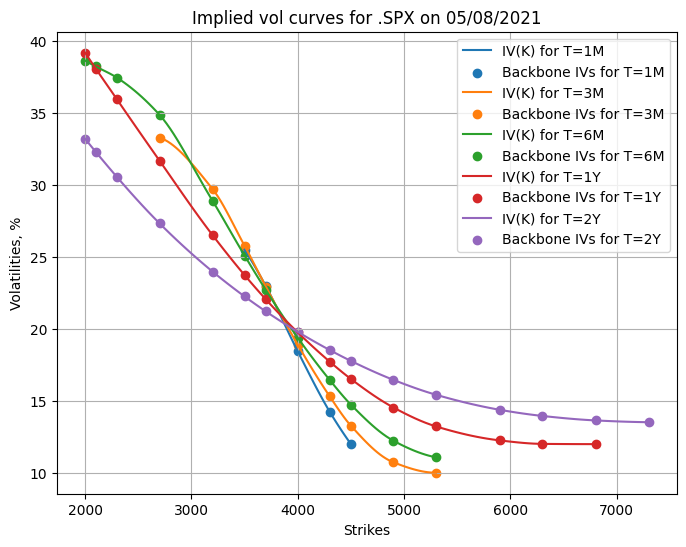

In [18]:
plt.figure(figsize=(8, 6))
for period_to_plot in periods_to_plot:
    strikes_and_volatility_curve_mapping = spx_period_to_strikes_and_volatility_curve_mapping[period_to_plot]
    selected_strikes = strikes_and_volatility_curve_mapping["strikes"]
    vol_interpolator = strikes_and_volatility_curve_mapping["vols"]
    selected_vols = vol_interpolator(np.log(selected_strikes))

    strike_min, strike_max = np.min(selected_strikes), np.max(selected_strikes)
    high_frequency_strikes_grid = np.linspace(strike_min, strike_max, 100)
    
    plt.plot(high_frequency_strikes_grid, vol_interpolator(np.log(high_frequency_strikes_grid)) * 100, label="IV(K) for T={}".format(period_to_plot))
    plt.scatter(selected_strikes, selected_vols * 100, label="Backbone IVs for T={}".format(period_to_plot))

plt.title("Implied vol curves for .SPX on {}".format(value_date))
plt.xlabel("Strikes")
plt.ylabel("Volatilities, %")
plt.grid()
plt.legend()
plt.show()

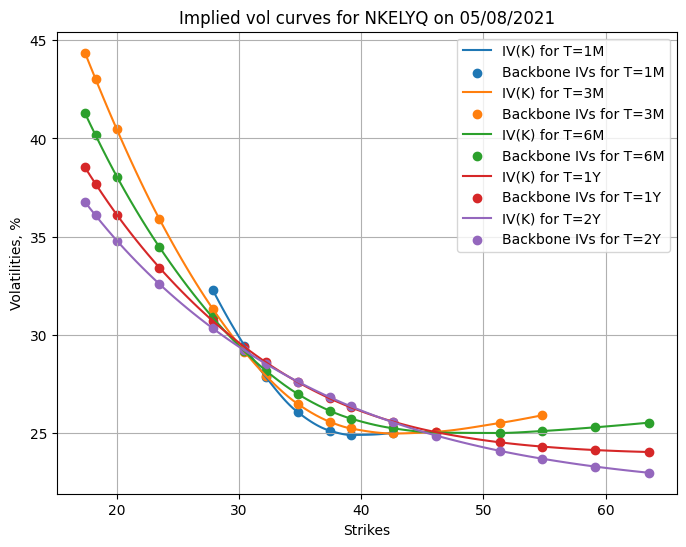

In [19]:
plt.figure(figsize=(8, 6))
for period_to_plot in periods_to_plot:
    strikes_and_volatility_curve_mapping = nkelyq_period_to_strikes_and_volatility_curve_mapping[period_to_plot]
    selected_strikes = strikes_and_volatility_curve_mapping["strikes"]
    vol_interpolator = strikes_and_volatility_curve_mapping["vols"]
    selected_vols = vol_interpolator(np.log(selected_strikes))

    strike_min, strike_max = np.min(selected_strikes), np.max(selected_strikes)
    high_frequency_strikes_grid = np.linspace(strike_min, strike_max, 100)
    
    plt.plot(high_frequency_strikes_grid, vol_interpolator(np.log(high_frequency_strikes_grid)) * 100, label="IV(K) for T={}".format(period_to_plot))
    plt.scatter(selected_strikes, selected_vols * 100, label="Backbone IVs for T={}".format(period_to_plot))

plt.title("Implied vol curves for NKELYQ on {}".format(value_date))
plt.xlabel("Strikes")
plt.ylabel("Volatilities, %")
plt.grid()
plt.legend()
plt.show()

##### 2.4 Instanteneous variance computation

The (forward) instanteneous variance $\sigma^2_{i, i+1}(s)$ and the implied volatilities $\hat \sigma_{i}$, $\hat \sigma_{i + 1}$ are related to each over with the following equation:

$$\hat \sigma^2_{i + 1} \cdot T_{i + 1} = \hat \sigma^2_{i} \cdot T_{i} + \int_{T_{i}}^{T_{i+1}} \sigma^2_{i, i + 1}(s) ds.$$

Assuming the piecewise-constant term structre of instanteneous variance, we get that on $[T_{i}, T_{i + 1}]$

$$\sigma^2_{i, i + 1}(s) \equiv \dfrac{\hat \sigma^2_{i + 1} \cdot T_{i + 1} - \hat \sigma^2_{i} \cdot T_{i}}{T_{i + 1} - T_{i}}$$

In [20]:
def get_instanteneous_volatilities_at_the_forwards(periods_floats: np.ndarray, 
                                                   periods: np.ndarray, forwards_at_periods: np.ndarray, 
                                                   period_to_strikes_and_volatility_curve_mapping: dict):
    """
    Computes instanteneous volatilites \sigma_{i, i + 1}(s) for a given period [t_i, t_{i + 1}]. 

    Args:
        periods_floats: array of periods at which instanteneous volatilites are computed. 
        periods: string representations of periods at which instanteneous volatilites are computed. 
        forwards_at_periods: forwards at given periods.  
        period_to_strikes_and_volatility_curve_mapping: t_i -> iv_smile(t_i) mapping.  
    """
    n = len(periods_floats)
    instanteneous_volatilities = np.zeros_like(periods)
    for i, _ in enumerate(periods_floats):
        if (i == 0) | (i == n - 1):
            strikes_and_volatility_curve_mapping = period_to_strikes_and_volatility_curve_mapping[periods[i]]
            instanteneous_volatilities[i] = float(strikes_and_volatility_curve_mapping["vols"](np.log(forwards_at_periods[i])))
        else:
            strikes_and_volatility_curve_mapping_1 = period_to_strikes_and_volatility_curve_mapping[periods[i - 1]] 
            strikes_and_volatility_curve_mapping_2 = period_to_strikes_and_volatility_curve_mapping[periods[i]] 

            variance_1 = (strikes_and_volatility_curve_mapping_1["vols"](np.log(forwards_at_periods[i - 1]))) ** 2 * periods_floats[i - 1]
            variance_2 = (strikes_and_volatility_curve_mapping_2["vols"](np.log(forwards_at_periods[i]))) ** 2 * periods_floats[i]

            instanteneous_volatilities[i] = np.sqrt((variance_2 - variance_1) / (periods_floats[i] - periods_floats[i - 1]))
    
    return instanteneous_volatilities

In [21]:
def get_forwards_at_periods(forwards, dates, periods):
    """
    Returns the forward prices at given periods. 

    Args:
        forwards: array of forwards at dates. 
        dates: array of dates at which forwards are given.
        periods: periods for which forwards should be computed. 
    """
    forwards_at_periods = np.zeros_like(periods)
    for i, period in enumerate(periods):
        index_of_period = np.where(periods == period)[0][0]
        date = dates[index_of_period]
        forwards_at_periods[i] = forwards[date]
    return forwards_at_periods        

In [22]:
spx_forwards_at_periods = get_forwards_at_periods(forwards=spx_forwards, dates=dates, periods=periods)
nkelyq_forwards_at_periods = get_forwards_at_periods(forwards=nkelyq_forwards, dates=dates, periods=periods)

In [23]:
spx_instanteneous_volatilities_at_periods =  get_instanteneous_volatilities_at_the_forwards(periods_floats=periods_floats, periods=periods, 
                                                                                        forwards_at_periods=spx_forwards_at_periods, 
                                                                                        period_to_strikes_and_volatility_curve_mapping=spx_period_to_strikes_and_volatility_curve_mapping)


nkelyq_instanteneous_volatilities_at_periods =  get_instanteneous_volatilities_at_the_forwards(periods_floats=periods_floats, periods=periods, 
                                                                                        forwards_at_periods=nkelyq_forwards_at_periods, 
                                                                                        period_to_strikes_and_volatility_curve_mapping=nkelyq_period_to_strikes_and_volatility_curve_mapping)

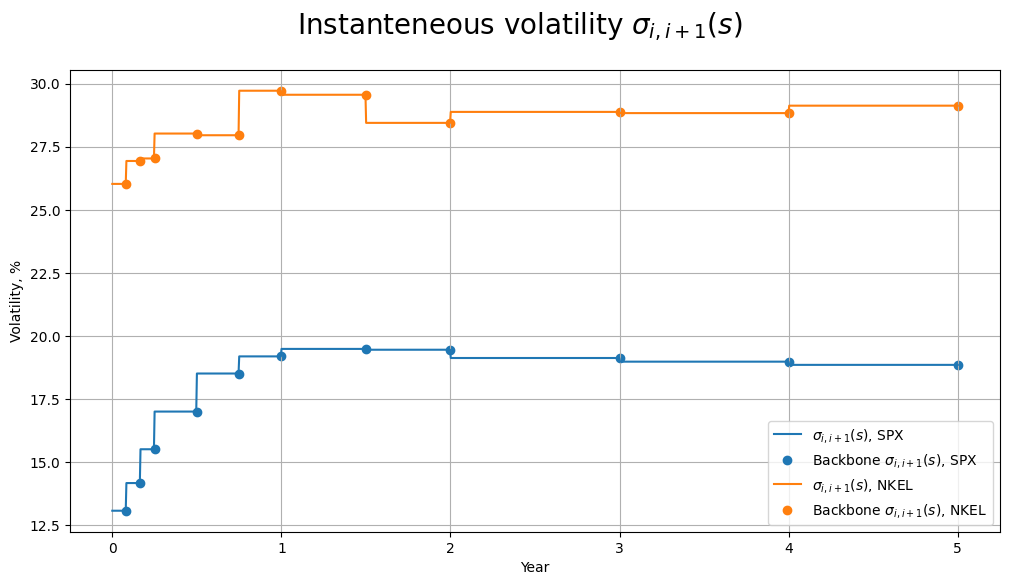

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

spx_interpolated_inst_vol = interp1d(x=periods_floats, y=spx_instanteneous_volatilities_at_periods, kind="next", fill_value="extrapolate")
nkelyq_interpolated_inst_vol = interp1d(x=periods_floats, y=nkelyq_instanteneous_volatilities_at_periods, kind="next", fill_value="extrapolate")
high_frequency_times_grid = np.linspace(0, periods_floats[-1], 252 * 5)


axs.plot(high_frequency_times_grid, 100 * spx_interpolated_inst_vol(high_frequency_times_grid), label="$\sigma_{i, i+1}(s)$, SPX")
axs.scatter(periods_floats, 100 * spx_instanteneous_volatilities_at_periods, label="Backbone $\sigma_{i, i+1}(s)$, SPX")

axs.plot(high_frequency_times_grid, 100 * nkelyq_interpolated_inst_vol(high_frequency_times_grid), label="$\sigma_{i, i+1}(s)$, NKEL")
axs.scatter(periods_floats, 100 * nkelyq_instanteneous_volatilities_at_periods, label="Backbone $\sigma_{i, i+1}(s)$, NKEL")

axs.set_xlabel("Year")
axs.set_ylabel("Volatility, %")
fig.suptitle('Instanteneous volatility $\sigma_{i, i+1}(s)$', fontsize=20)
plt.grid()
plt.legend()
plt.show()

##### 2.5 Log covariance matrix

The function which computes the log-covariances

$$c_{ij}(t) =  \rho_{ij} \int_{0}^{t} \sigma_i(s) \sigma_j(s) ds = \rho_{ij} \left( \sum_{k = 0}^{d(t) - 1} \sigma_i(t_k) \sigma_j(t_k) (t_{k + 1} - t_k) + \sigma_i(t) \sigma_j(t) (t - t_{d(t)})\right),$$

where $d(t) = \max{ \{ t_k: t_{k} < t, t_{k + 1} \geq t \}}.$ 

In [25]:
def get_log_covariance(instanteneous_volatilities_at_periods_1: np.ndarray,
                       instanteneous_volatilities_at_periods_2: np.ndarray,
                       periods_floats: np.ndarray, correlation: float, t: float):
    """
    Returns the log-covariances c_ij(t) = \rho_ij \cdot \int_{0}^{t} \sigma_i(s) \sigma_j(s) ds.

    Args:
        instanteneous_volatilities_at_periods_1: array of instanteneous volatilities \sigma_1(s) for s from array of periods.
        instanteneous_volatilities_at_periods_2: array of instanteneous volatilities \sigma_1(s) for s from array of periods. 
        periods_floats: array of periods at which instanteneous volatilites are computed. 
        correlation: the correlation between brownian motions W^1 and W^2 driving the S^1 and S^2. 
        t: the time point at which the log-covariance is computed. 
    """
    if t <= periods_floats[0]:
        return correlation * instanteneous_volatilities_at_periods_1[0] * instanteneous_volatilities_at_periods_2[0] * t
    
    if np.abs(periods_floats[0]) > 1e-8:
        periods_floats = np.insert(periods_floats, 0, 0)

    periods_before = np.where(periods_floats  <= t)[0]
    periods_strictly_before = periods_before[:-1]
    periods_floats_diffs = np.diff(periods_floats)
    integral_ = np.sum(periods_floats_diffs[periods_strictly_before] * instanteneous_volatilities_at_periods_1[periods_strictly_before] * instanteneous_volatilities_at_periods_2[periods_strictly_before])
    integral = integral_ + (t - periods_floats[periods_before[-1]]) * instanteneous_volatilities_at_periods_1[periods_before[-1]] * instanteneous_volatilities_at_periods_2[periods_before[-1]]
    return integral * correlation


Compute the whole log-covariance matrix 

$$\left( \text{Cov} [\log{S^i_t}, \log{S^j_t}] \right)_{i,j = 1,2} = \left( \rho_{ij} \int_{0}^{t} \sigma_i(s) \sigma_j(s) ds\right)_{i,j =1,2}$$

In [26]:
def get_log_covariances_matrix(instanteneous_volatilities_at_periods_1: np.ndarray,
                               instanteneous_volatilities_at_periods_2: np.ndarray,
                               periods_floats: np.ndarray, correlation: float, t: float):
    """
    Computes log-covariance Cov[\log(S^i_t), \log(S^j_t)] = \rho \int_{0}^{t} \sigma_i(s) \sigma_j(s) ds matrix, i,j=1,2. 

    Args:
        instanteneous_volatilities_at_periods_1: array of instanteneous volatilities \sigma_1(s) for s from array of periods.
        instanteneous_volatilities_at_periods_2: array of instanteneous volatilities \sigma_1(s) for s from array of periods. 
        periods_floats: array of periods at which instanteneous volatilites are computed. 
        correlation: the correlation between brownian motions W^1 and W^2 driving the S^1 and S^2. 
        t: the time point at which the log-covariance matrix is computed. 
    """
    log_variance_1 = get_log_covariance(instanteneous_volatilities_at_periods_1=instanteneous_volatilities_at_periods_1, 
                                         instanteneous_volatilities_at_periods_2=instanteneous_volatilities_at_periods_1,
                                         periods_floats=periods_floats,
                                         correlation=1, t=t)
    log_variance_2 = get_log_covariance(instanteneous_volatilities_at_periods_1=instanteneous_volatilities_at_periods_2, 
                                         instanteneous_volatilities_at_periods_2=instanteneous_volatilities_at_periods_2,
                                         periods_floats=periods_floats,
                                         correlation=1, t=t)
    log_covariance = get_log_covariance(instanteneous_volatilities_at_periods_1=instanteneous_volatilities_at_periods_1, 
                                         instanteneous_volatilities_at_periods_2=instanteneous_volatilities_at_periods_2,
                                         periods_floats=periods_floats,
                                         correlation=correlation, t=t)
    return np.array([[log_variance_1, log_covariance], [log_covariance, log_variance_2]])

In [27]:
t = periods_floats[2]
log_cov_matrix = get_log_covariances_matrix(instanteneous_volatilities_at_periods_1=spx_instanteneous_volatilities_at_periods,
                                            instanteneous_volatilities_at_periods_2=nkelyq_instanteneous_volatilities_at_periods,
                                            periods_floats=periods_floats, correlation=corr, t=t)

In [28]:
log_cov_matrix

array([[0.0051059 , 0.00519719],
       [0.00519719, 0.01778002]])

##### 2.6 Moment matching

Compute moments $m_1, m_2, m_3$ (and corresponding centralized ones $\mu_2$ and $\mu_3$). Notice that $m_2$ and $m_3$ can be computed within the following array-broadcasting formulas 

$$
\begin{align*}
m_2 &=  \sum_{i, j=1}^{m} w_i w_j F^{i}_T F^{j}_T e^{c_{i,j}} = (w \circ F) \cdot \tilde C \cdot (w \circ F)^T, \\
m_3  &=  \sum_{i, k, j=1}^{m} w_i w_k w_j F^{i}_T F^{k}_T F^{j}_T e^{c_{i,j} + c_{i, k} + c_{j, k}} = (w \circ F) \cdot \tilde B \cdot (w \circ F)^T, \\
\end{align*}
$$

where 
$$(\tilde C)_{i, j} = (e^{c_{ij}})_{i, j}, \quad \tilde B = ((w \circ F)^T \circ \tilde C) \cdot \tilde C) \circ \tilde C,$$
and $x \circ y $ denotes the elementwise (aka numpy style) multiplication. 

Finally, we solve
$$
\begin{cases}
F^3 - \frac{3\mu_2^2}{\mu_3} F^2 - \frac{\mu_2^3}{\mu_3} = 0, \\
\delta = F - \mu_1, \\
\sigma = \ln^{1/2}(1 + \frac{\mu_2}{F^2}).
\end{cases}
$$

In [29]:
def moment_matching(forwards: np.array, log_covariance: np.array, weights: np.array):
    """
    Computes the desired forward F, strike adjustment \delta and implied standard deviation \sigma.

    Args:
        forwards: an array of forwards of corresponding assets, i.e. F^1(t, T) and F^2(t, T)
        log_covariance: a matrix of log covariances cov[\log(S^i_T), \log(S^j_T)], i = 1, 2.
        weights: an array of weights of corresponding assets in options payoff. 
    """
    covariance = np.exp(log_covariance)
    weighted_forwards = forwards * weights
    m1 = np.sum(weighted_forwards)
    m2 = (weighted_forwards) @ covariance @ (weighted_forwards).T
    B = ((weighted_forwards.T * covariance) @ covariance) * covariance
    m3 = weighted_forwards @ B @ (weighted_forwards).T

    mu_2 = m2 - m1 ** 2
    mu_3 = m3 - 3 * m1 * m2 + 2 * m1 ** 3

    F = CubicEquation([1, - 3 * mu_2 ** 2 / mu_3, 0, - mu_2 ** 3 / mu_3]).answers[0].real
    delta = F - m1
    sigma = np.sqrt(np.log(1 + mu_2 / (F ** 2)))

    return F, delta, sigma

##### 2.7 Black formula

Given the computed forward $F$, strike adjustment $\delta$ and implied standard deviation $\sigma$, we are ready to apply the Black formula: 

$$PV^{\text{Basket option}} = \text{Black}(F, K + \delta, \sigma / \sqrt{T}, T).$$

In [30]:
def black_price_formula(F: float,
                        K: Union[float, np.ndarray],
                        T: float,
                        sigma: Union[float, np.ndarray],
                        isCall: bool = True,
                        df: float = 1) -> Union[float, np.ndarray]:
    """Pricing formula from Black76. Broadcasts in both forward and strike.

    Args:
        F: forward.
        K: grid of strikes.
        T: tenor.
        sigma: implied volatility.
        isCall: type of option (True if Call, False if Put).
        df: discount factor. 

    Returns 2D array in spot (rows) and strikes (columns) grid.
    """
    if isinstance(K, (float, int)):
        assert isinstance(sigma, (float, int)), "K and sigma should both either floats or np.ndarrays"
    elif isinstance(K, np.ndarray):
        assert isinstance(sigma, np.ndarray), "K and sigma should both either floats or np.ndarrays"
    else:
        raise TypeError("K and sigma should both either floats or np.ndarrays")
    
    stddev = sigma * np.sqrt(T)
    d1 = np.log(F / K) / stddev + 0.5 * stddev
    d2 = d1 - stddev
    theta = 1.0 if isCall else -1.0
    return df * theta * (F * norm.cdf(theta * d1) - K * norm.cdf(theta * d2))

In [31]:
# Basket price
correlation = corr

F_spx = spx_forwards_at_periods[2]
F_nkelyq = nkelyq_forwards_at_periods[2]
K = 1

weights = np.array([0.5 / S_spx,   0.5 / S_nkel])

F_, delta, sigma = moment_matching(forwards=np.array([F_spx, F_nkelyq]), 
                                   log_covariance=log_cov_matrix, 
                                   weights=weights)
iv_ = sigma / np.sqrt(t)

basket_price = black_price_formula(F = F_, K = K + delta, T = t, sigma = iv_, isCall=True)
print("Basket forward = {}, strike adjustment = {}, implied variance sigma = {}".format(F_, delta, sigma))
print("Basket price = {}, implied vol = {}".format(basket_price, iv_))

Basket forward = 0.865519, strike adjustment = -0.12699188040091836, implied variance sigma = 0.10442507161247931
Basket price = 0.03257515716135262, implied vol = 0.20885014322495862


##### 2.7 Sanity check

How we can check ourselves that we have implemented all formulas correctly? We can price the option on basket constituing from one asset. Indeed, if the basket includes only one asset, the result should give us the same price as we observe on the market. 

Let $T=6M$, $S^1 = S^2$, $w_1 = w_2 = 0.5$, $K = F^{1}_0$ (i.e. ATF option). 

$$\text{Payoff}^{\text{Basket Call}} = \left( w_1 \cdot S^1_T + w_2 \cdot S^2_T - K \right)_{+} = \left(S^1_T - K \right)_{+} = \text{Payoff}^{\text{European Call}}.$$


In [32]:
# Market price for SPX

F = spx_forwards_at_periods[2]
K = F
T = periods_floats[2]
iv = float(spx_period_to_strikes_and_volatility_curve_mapping[periods[2]]["vols"](np.log(spx_forwards_at_periods[2])))

market_price_vanilla = black_price_formula(F=F, K=K, T=T, sigma=iv, isCall=True)
print("Market vanilla price = {}, implied vol = {}".format(market_price_vanilla, iv))

Market vanilla price = 125.28158115497081, implied vol = 0.1429112179888234


In [33]:
# Basket price for SPX
T = periods_floats[2]
correlation = 1

log_cov_matrix_test = get_log_covariances_matrix(instanteneous_volatilities_at_periods_1=spx_instanteneous_volatilities_at_periods,
                                                 instanteneous_volatilities_at_periods_2=spx_instanteneous_volatilities_at_periods,
                                                 periods_floats=periods_floats, correlation=correlation, t=T)

F = spx_forwards_at_periods[2]
K = F
weights = np.array([0.5, 0.5])

F_, delta, sigma = moment_matching(forwards=F, log_covariance=log_cov_matrix_test, weights=weights)
iv_ = sigma / np.sqrt(T)

basket_price = black_price_formula(F = F_, K = K + delta, T = T, sigma = iv_, isCall=True)
print("Basket forward = {}, strike adjustment = {}, implied variance sigma = {}".format(F_, delta, sigma))
print("Basket price = {}, implied vol = {}".format(basket_price, iv_))

Basket forward = 4395.752398, strike adjustment = 0.0, implied variance sigma = 0.07145560899441099
Basket price = 125.28158115496944, implied vol = 0.14291121798882198


In [34]:
# Comparison for SPX

print("Implied vols absolute difference for SPX = {}".format(abs(iv_ - iv)))
print("PV's relative difference for SPX = {}".format(abs(basket_price - market_price_vanilla) / market_price_vanilla))

Implied vols absolute difference for SPX = 1.4155343563970746e-15
PV's relative difference for SPX = 1.088940640820818e-14


In [35]:
# Market price for NKELyq

F = nkelyq_forwards_at_periods[2]
K = F
T = periods_floats[2]
iv = float(nkelyq_period_to_strikes_and_volatility_curve_mapping[periods[2]]["vols"](np.log(nkelyq_forwards_at_periods[2])))

market_price_vanilla = black_price_formula(F=F, K=K, T=T, sigma=iv, isCall=True)
print("Market vanilla price = {}, implied vol = {}".format(market_price_vanilla, iv))

Market vanilla price = 1.826839848029202, implied vol = 0.26668350649156525


In [36]:
# Basket price for NKELyq
T = periods_floats[2]
correlation = 1

log_cov_matrix_test = get_log_covariances_matrix(instanteneous_volatilities_at_periods_1=nkelyq_instanteneous_volatilities_at_periods,
                                                 instanteneous_volatilities_at_periods_2=nkelyq_instanteneous_volatilities_at_periods,
                                                 periods_floats=periods_floats, correlation=correlation, t=T)

F = nkelyq_forwards_at_periods[2]
K = F
weights = np.array([0.5, 0.5])

F_, delta, sigma = moment_matching(forwards=F, log_covariance=log_cov_matrix_test, weights=weights)
iv_ = sigma / np.sqrt(T)

basket_price = black_price_formula(F = F_, K = K + delta, T = T, sigma = iv_, isCall=True)
print("Asian forward = {}, strike adjustment = {}, implied variance sigma = {}".format(F_, delta, sigma))
print("Basket price = {}, implied vol = {}".format(basket_price, iv_))

Asian forward = 34.367338, strike adjustment = 9.999993721976352e-09, implied variance sigma = 0.13334175320732614
Basket price = 1.8268398480346733, implied vol = 0.26668350641465227


In [37]:
# Comparison for NKELyq

print("Implied vols absolute difference for NKELyq = {}".format(abs(iv_ - iv)))
print("PV's relative difference for NKELyq = {}".format(abs(basket_price - market_price_vanilla) / market_price_vanilla))

Implied vols absolute difference for NKELyq = 7.69129759881082e-11
PV's relative difference for NKELyq = 2.994887083974596e-12


### References

1. Turnbull, Stuart M. and Lee Macdonald Wakeman. A Quick Algorithm for Pricing European Average Options. *Journal of Financial and Quantitative Analysis* 26 (1991): 377 - 389.